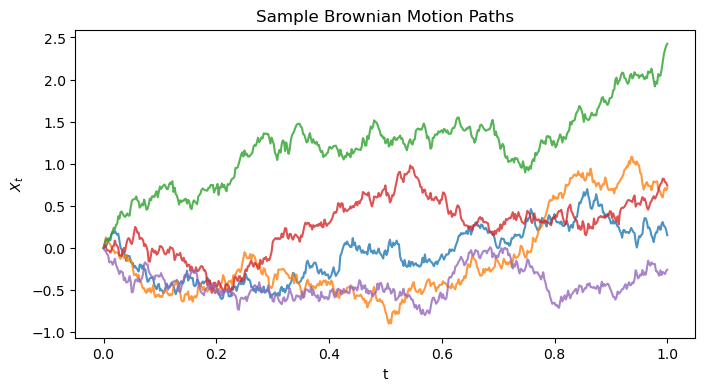

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
T, n_steps, n_paths = 1.0, 500, 5
dt = T / n_steps
t = np.linspace(0, T, n_steps + 1)

# Brownian motion: cumulative sum of Gaussian increments
dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)
W = np.zeros((n_paths, n_steps + 1))
W[:, 1:] = np.cumsum(dW, axis=1)

plt.figure(figsize=(8, 4))
for i in range(n_paths):
    plt.plot(t, W[i], alpha=0.8)
plt.xlabel('t'); plt.ylabel('$X_t$')
plt.title('Sample Brownian Motion Paths')
plt.savefig("./figures/brownian_motion.png",
            dpi=300, bbox_inches='tight'
            )
plt.show()

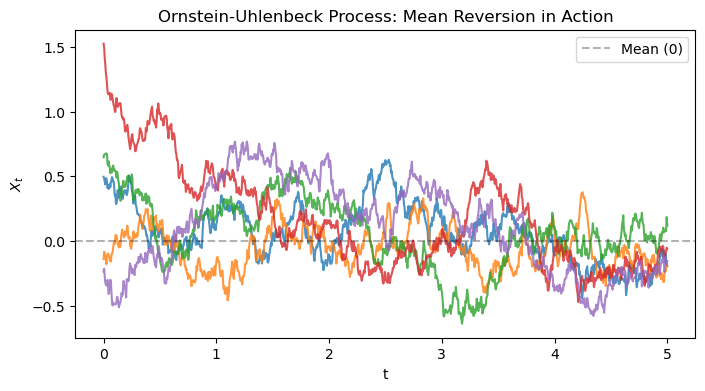

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
T, n_steps, n_paths = 5.0, 1000, 5
dt = T / n_steps
t = np.linspace(0, T, n_steps + 1)

# OU parameters
theta = 2.0   # mean reversion speed
sigma = 0.5   # volatility

# Simulate OU process: dX = -theta * X * dt + sigma * dW
X = np.zeros((n_paths, n_steps + 1))
X[:, 0] = np.random.randn(n_paths)  # start at random positions

for i in range(n_steps):
    dW = np.sqrt(dt) * np.random.randn(n_paths)
    X[:, i+1] = X[:, i] - theta * X[:, i] * dt + sigma * dW

plt.figure(figsize=(8, 4))
for i in range(n_paths):
    plt.plot(t, X[i], alpha=0.8)
plt.axhline(0, color='k', linestyle='--', alpha=0.3, label='Mean (0)')
plt.xlabel('t'); plt.ylabel('$X_t$')
plt.title('Ornstein-Uhlenbeck Process: Mean Reversion in Action')
plt.legend()
plt.savefig("./figures/ornstein_uhlenbeck.png",
            dpi=300, bbox_inches='tight'
            )
plt.show()

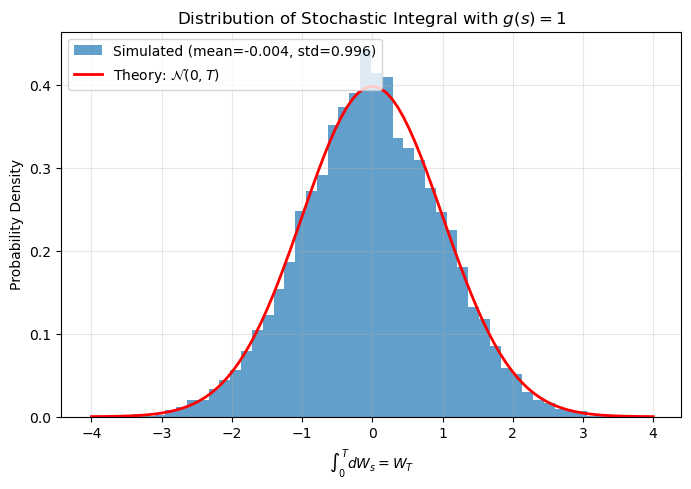

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
T = 1.0
n_steps = 500
n_paths = 10000
dt = T / n_steps

# Generate Brownian motion paths
dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)
W = np.cumsum(dW, axis=1)  # Each row is a Brownian path

# The stochastic integral with g(s) = 1 is simply W_T
stochastic_integral = W[:, -1]  # W_T for each path

# Theory: mean = 0, variance = T
theoretical_mean = 0
theoretical_std = np.sqrt(T)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(stochastic_integral, bins=50, density=True, alpha=0.7, 
         label=f'Simulated (mean={np.mean(stochastic_integral):.3f}, std={np.std(stochastic_integral):.3f})')

# Overlay theoretical Gaussian
x = np.linspace(-4, 4, 100)
plt.plot(x, 1/np.sqrt(2*np.pi*T) * np.exp(-x**2/(2*T)), 'r-', linewidth=2,
         label=r'Theory: $\mathcal{N}(0, {T})$')
plt.xlabel('$\int_0^T dW_s = W_T$')
plt.ylabel('Probability Density')
plt.title('Distribution of Stochastic Integral with $g(s) = 1$')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

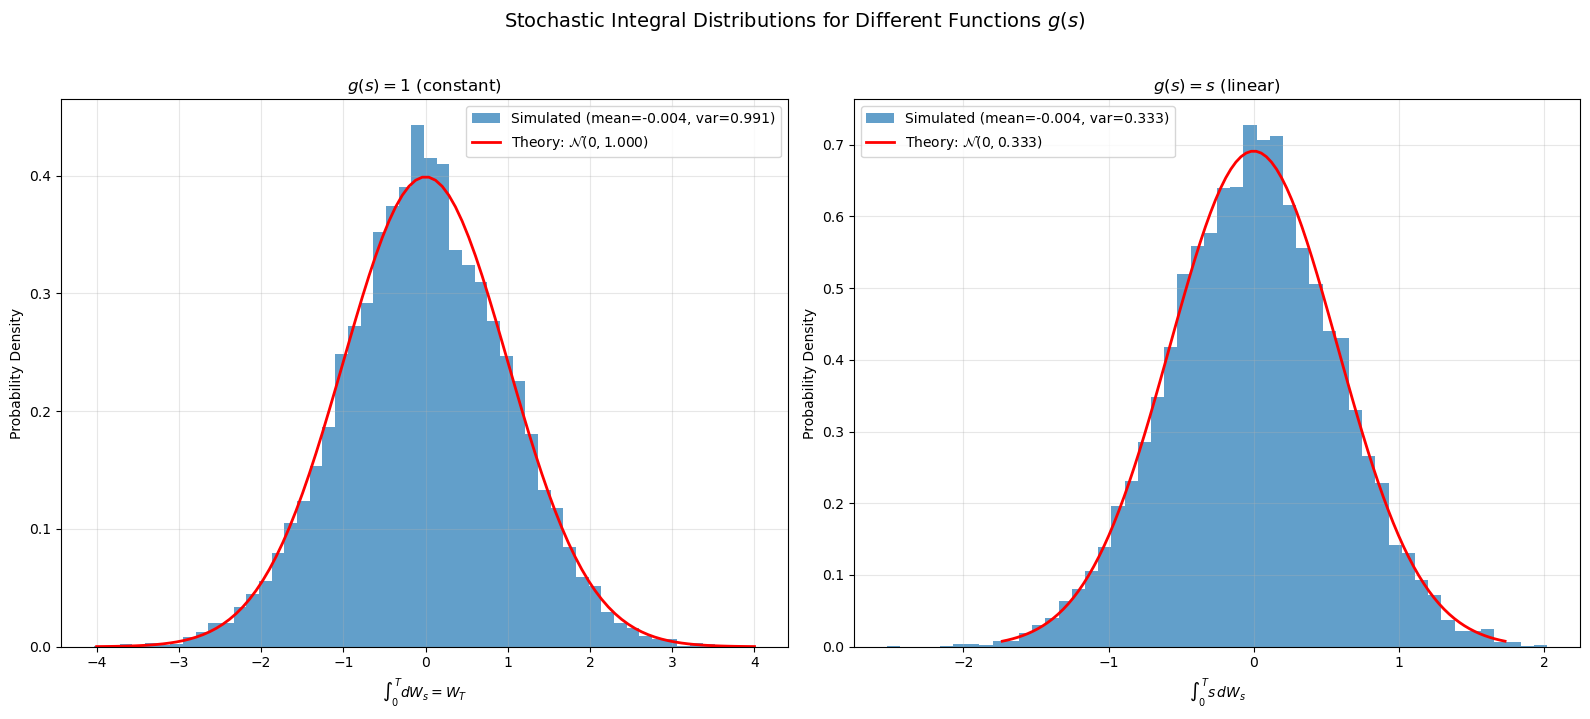

g(s) = 1:  Theoretical variance = 1.0000, Empirical variance = 0.9911
g(s) = s:  Theoretical variance = 0.3333, Empirical variance = 0.3328


In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
T = 1.0
n_steps = 500
n_paths = 10000
dt = T / n_steps
t_grid = np.linspace(0, T, n_steps)

# Generate Brownian motion paths
dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)
W = np.cumsum(dW, axis=1)

# Case 1: g(s) = 1
# The stochastic integral is simply W_T
integral_constant = W[:, -1]
var_constant = T

# Case 2: g(s) = s
# Using left-endpoint approximation: sum of g(t_{i-1}) * dW_i
integral_linear = np.zeros(n_paths)
for i in range(n_steps):
    g_value = t_grid[i]  # g(s) = s evaluated at left endpoint
    integral_linear += g_value * dW[:, i]
var_linear = T**3 / 3

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: g(s) = 1
axes[0].hist(integral_constant, bins=50, density=True, alpha=0.7, 
             label=f'Simulated (mean={np.mean(integral_constant):.3f}, var={np.var(integral_constant):.3f})')
x1 = np.linspace(-4, 4, 100)
axes[0].plot(x1, 1/np.sqrt(2*np.pi*var_constant) * np.exp(-x1**2/(2*var_constant)), 
            'r-', linewidth=2, label=f'Theory: $\mathcal{{N}}(0, {var_constant:.3f})$')
axes[0].set_xlabel(r'$\int_0^T dW_s = W_T$')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('$g(s) = 1$ (constant)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: g(s) = s
axes[1].hist(integral_linear, bins=50, density=True, alpha=0.7, 
             label=f'Simulated (mean={np.mean(integral_linear):.3f}, var={np.var(integral_linear):.3f})')
std_linear = np.sqrt(var_linear)
x2 = np.linspace(-3*std_linear, 3*std_linear, 100)
axes[1].plot(x2, 1/np.sqrt(2*np.pi*var_linear) * np.exp(-x2**2/(2*var_linear)), 
            'r-', linewidth=2, label=f'Theory: $\mathcal{{N}}(0, {var_linear:.3f})$')
axes[1].set_xlabel(r'$\int_0^T s \, dW_s$')
axes[1].set_ylabel('Probability Density')
axes[1].set_title('$g(s) = s$ (linear)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Stochastic Integral Distributions for Different Functions $g(s)$', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("./figures/stochastic_integral_comparison.png",
            dpi=300, bbox_inches='tight')
plt.show()

print(f"g(s) = 1:  Theoretical variance = {var_constant:.4f}, Empirical variance = {np.var(integral_constant):.4f}")
print(f"g(s) = s:  Theoretical variance = {var_linear:.4f}, Empirical variance = {np.var(integral_linear):.4f}")

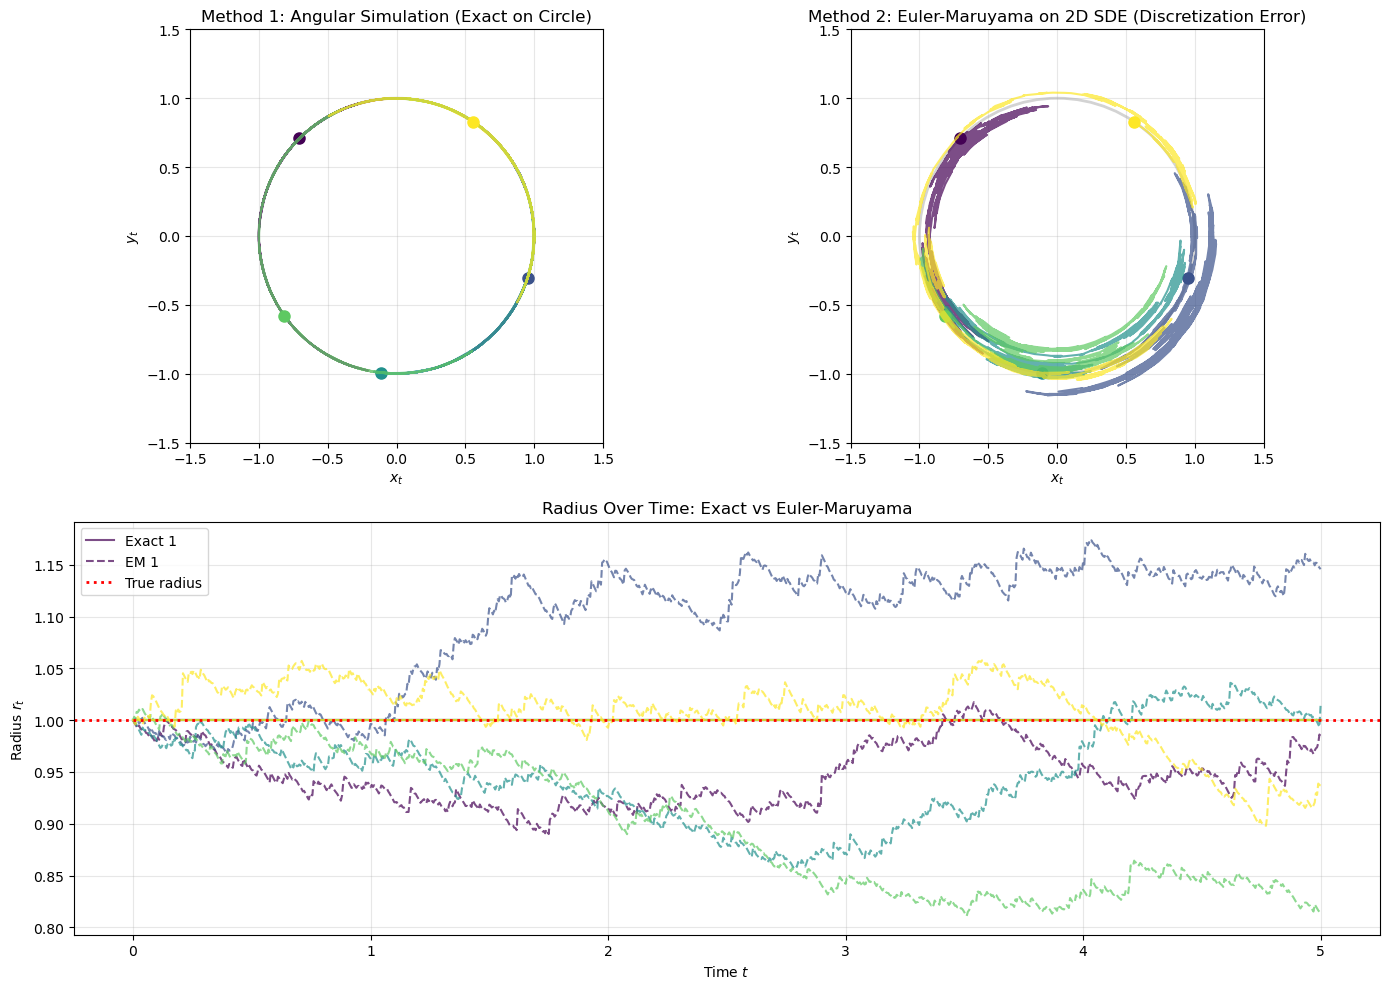

Exact method - Radius: min=1.000000, max=1.000000, mean=1.000000
Euler-Maruyama - Radius: min=0.811071, max=1.173566, mean=0.978846
EM radius deviation: std=0.083682


In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
T = 5.0
n_steps = 1000
n_paths = 5
dt = T / n_steps
t = np.linspace(0, T, n_steps + 1)

# Method 1: Simulate angular BM (stays exactly on circle)
theta_exact = np.zeros((n_paths, n_steps + 1))
theta_exact[:, 0] = np.random.uniform(0, 2*np.pi, n_paths)
for i in range(n_steps):
    dW = np.sqrt(dt) * np.random.randn(n_paths)
    theta_exact[:, i+1] = theta_exact[:, i] + dW

x_exact = np.cos(theta_exact)
y_exact = np.sin(theta_exact)

# Method 2: Euler-Maruyama on the 2D SDE (has discretization error)
np.random.seed(42)  # Same random numbers for fair comparison
x_em = np.zeros((n_paths, n_steps + 1))
y_em = np.zeros((n_paths, n_steps + 1))
# Start at same positions
x_em[:, 0] = np.cos(theta_exact[:, 0])
y_em[:, 0] = np.sin(theta_exact[:, 0])

for i in range(n_steps):
    dW = np.sqrt(dt) * np.random.randn(n_paths)
    # Euler-Maruyama step
    x_em[:, i+1] = x_em[:, i] - 0.5 * x_em[:, i] * dt - y_em[:, i] * dW
    y_em[:, i+1] = y_em[:, i] - 0.5 * y_em[:, i] * dt + x_em[:, i] * dW

# Compute radii
radii_exact = np.sqrt(x_exact**2 + y_exact**2)
radii_em = np.sqrt(x_em**2 + y_em**2)

# Create visualization
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

colors = plt.cm.viridis(np.linspace(0, 1, n_paths))

# Plot 1: Exact method (angular simulation)
circle1 = plt.Circle((0, 0), 1, color='lightgray', fill=False, linewidth=2)
ax1.add_patch(circle1)
for i in range(n_paths):
    ax1.plot(x_exact[i], y_exact[i], alpha=0.7, linewidth=1.5, color=colors[i])
    ax1.plot(x_exact[i, 0], y_exact[i, 0], 'o', markersize=8, color=colors[i])
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_aspect('equal')
ax1.grid(alpha=0.3)
ax1.set_xlabel('$x_t$')
ax1.set_ylabel('$y_t$')
ax1.set_title('Method 1: Angular Simulation (Exact on Circle)')

# Plot 2: Euler-Maruyama on 2D SDE
circle2 = plt.Circle((0, 0), 1, color='lightgray', fill=False, linewidth=2)
ax2.add_patch(circle2)
for i in range(n_paths):
    ax2.plot(x_em[i], y_em[i], alpha=0.7, linewidth=1.5, color=colors[i])
    ax2.plot(x_em[i, 0], y_em[i, 0], 'o', markersize=8, color=colors[i])
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.grid(alpha=0.3)
ax2.set_xlabel('$x_t$')
ax2.set_ylabel('$y_t$')
ax2.set_title('Method 2: Euler-Maruyama on 2D SDE (Discretization Error)')

# Plot 3: Radius over time for both methods
for i in range(n_paths):
    ax3.plot(t, radii_exact[i], alpha=0.7, linewidth=1.5, 
                    color=colors[i], linestyle='-', label=f'Exact {i+1}' if i == 0 else '')
    ax3.plot(t, radii_em[i], alpha=0.7, linewidth=1.5, 
                    color=colors[i], linestyle='--', label=f'EM {i+1}' if i == 0 else '')
ax3.axhline(1, color='red', linestyle=':', linewidth=2, label='True radius')
ax3.set_xlabel('Time $t$')
ax3.set_ylabel('Radius $r_t$')
ax3.set_title('Radius Over Time: Exact vs Euler-Maruyama')
ax3.legend()
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("./figures/brownian_circle.png",
            dpi=300, bbox_inches='tight')
plt.show()

print(f"Exact method - Radius: min={radii_exact.min():.6f}, max={radii_exact.max():.6f}, mean={radii_exact.mean():.6f}")
print(f"Euler-Maruyama - Radius: min={radii_em.min():.6f}, max={radii_em.max():.6f}, mean={radii_em.mean():.6f}")
print(f"EM radius deviation: std={np.std(radii_em):.6f}")

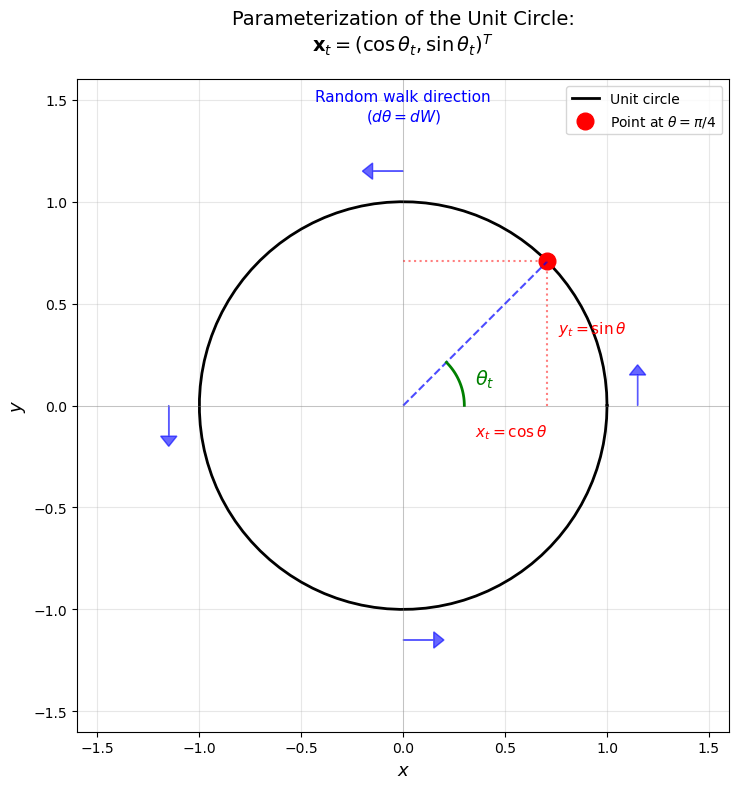

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the unit circle
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
ax.plot(x_circle, y_circle, 'k-', linewidth=2, label='Unit circle')

# Example angle
theta = np.pi / 4  # 45 degrees
x = np.cos(theta)
y = np.sin(theta)

# Draw the point
ax.plot(x, y, 'ro', markersize=12, label=r'Point at $\theta = \pi/4$')

# Draw radius line from origin to point
ax.plot([0, x], [0, y], 'b--', linewidth=1.5, alpha=0.7)

# Draw angle arc
theta_arc = np.linspace(0, theta, 30)
r_arc = 0.3
x_arc = r_arc * np.cos(theta_arc)
y_arc = r_arc * np.sin(theta_arc)
ax.plot(x_arc, y_arc, 'g-', linewidth=2)
ax.text(0.35, 0.1, r'$\theta_t$', fontsize=14, color='green')

# Draw coordinate projections
ax.plot([x, x], [0, y], 'r:', linewidth=1.5, alpha=0.5)
ax.plot([0, x], [y, y], 'r:', linewidth=1.5, alpha=0.5)
ax.text(x + 0.05, y/2, r'$y_t = \sin\theta$', fontsize=11, color='red')
ax.text(x/2, -0.15, r'$x_t = \cos\theta$', fontsize=11, color='red')

# Draw coordinate axes
ax.axhline(0, color='gray', linewidth=0.5, linestyle='-', alpha=0.5)
ax.axvline(0, color='gray', linewidth=0.5, linestyle='-', alpha=0.5)

# Draw direction arrows showing motion
arrow_positions = [0, np.pi/2, np.pi, 3*np.pi/2]
for pos in arrow_positions:
    x_pos = 1.15 * np.cos(pos)
    y_pos = 1.15 * np.sin(pos)
    dx = -0.15 * np.sin(pos)
    dy = 0.15 * np.cos(pos)
    ax.arrow(x_pos, y_pos, dx, dy, head_width=0.08, head_length=0.05, 
             fc='blue', ec='blue', alpha=0.6)

ax.text(0, 1.4, 'Random walk direction\n($d\\theta = dW$)', 
        fontsize=11, ha='center', color='blue')

# Labels and formatting
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
ax.set_title('Parameterization of the Unit Circle:\n' + 
             r'$\mathbf{x}_t = (\cos\theta_t, \sin\theta_t)^T$', 
             fontsize=14, pad=20)
ax.set_aspect('equal')
ax.grid(alpha=0.3)
ax.set_xlim(-1.6, 1.6)
ax.set_ylim(-1.6, 1.6)
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig('./figures/circle_parameterization.png',
            dpi=300, bbox_inches='tight')
plt.show()
